#Punto 1 – Solución Sugerida



In [ ]:
if (!require('caret')) install.packages('caret')
if (!require('MLmetrics')) install.packages('MLmetrics')
if (!require('e1071')) install.packages('e1071')

Loading required package: caret

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:MLmetrics’:

    MAE, RMSE




k-Nearest Neighbors 

232 samples
  6 predictor
  2 classes: 'Abnormal', 'Normal' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 209, 209, 209, 208, 209, 209, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.8574275  0.6713196
   2  0.8188406  0.5630495
   3  0.8659420  0.6802871
   4  0.8402174  0.6229371
   5  0.8617754  0.6724480
   6  0.8403986  0.6191730
   7  0.8621377  0.6753752
   8  0.8538043  0.6583675
   9  0.8621377  0.6806012
  10  0.8447464  0.6364632
  11  0.8577899  0.6697299
  12  0.8576087  0.6841950
  13  0.8619565  0.6875874
  14  0.8661232  0.6964415
  15  0.8572464  0.6792248
  16  0.8615942  0.6906825
  17  0.8572464  0.6830139
  18  0.8659420  0.6997605
  19  0.8572464  0.6822797
  20  0.8485507  0.6672193
  21  0.8400362  0.6442014
  22  0.8530797  0.6738887
  23  0.8528986  0.6695844
  24  0.8487319  0.6592618
  25  0.8487319  0.6615630
  26  0.8360507  0.6331854
  27  0.8447464  0.64888

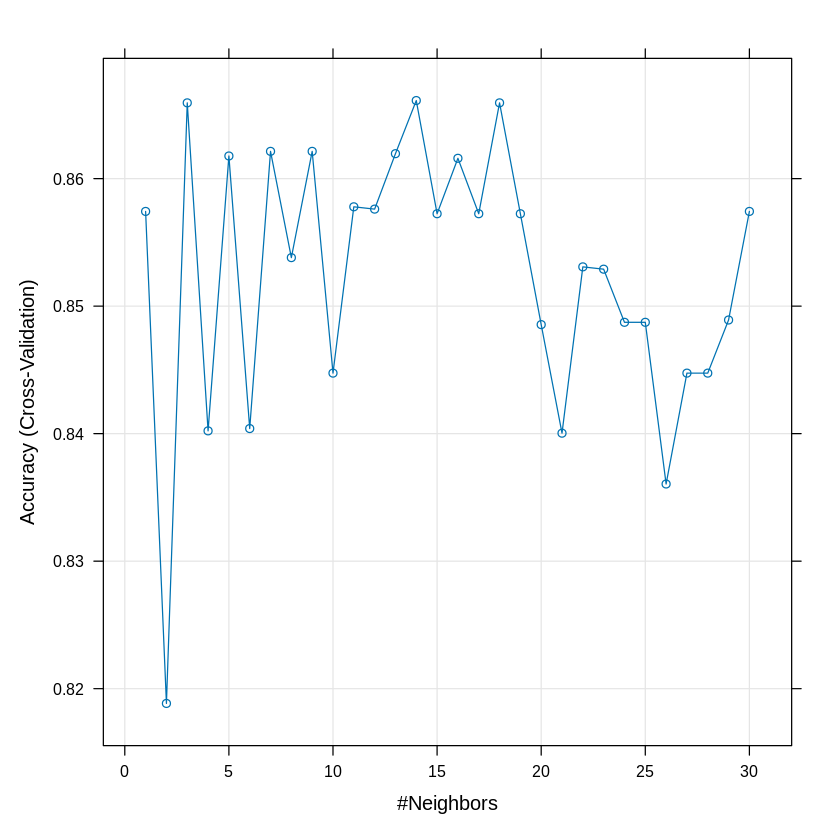

In [ ]:
set.seed(814)

df <- read.csv('/content/Biomecánica-Ortopedia.csv')

df_clean <- na.omit(df)

X <- df_clean[, 1:6]
y <- df_clean$class

df_clean$class <- as.factor(df_clean$class)

set.seed(814)
sample <- sample.int(nrow(df_clean), floor(0.75 * nrow(df_clean)))
train_data <- df_clean[sample, ]
test_data <- df_clean[-sample, ]

cross <- trainControl(method = "cv", number = 10)

modeloknn <- train(
  class ~ .,
  data = train_data,
  method = "knn",
  tuneGrid = expand.grid(k = 1:30),
  trControl = cross,
  metric = "Accuracy"
)

modeloknn
plot(modeloknn)

In [ ]:
# Evaluar el modelo en el conjunto de prueba
pred_knn <- predict(modeloknn, newdata = test_data)

# Asegurar que las predicciones y los valores de prueba tengan los mismos niveles de factor
pred_knn <- factor(pred_knn, levels = levels(test_data$class))

# Evaluar el rendimiento del modelo usando confusionMatrix
confusionMatrix(pred_knn, test_data$class)

Confusion Matrix and Statistics

          Reference
Prediction Abnormal Normal
  Abnormal       46      9
  Normal          4     19
                                          
               Accuracy : 0.8333          
                 95% CI : (0.7319, 0.9082)
    No Information Rate : 0.641           
    P-Value [Acc > NIR] : 0.0001529       
                                          
                  Kappa : 0.623           
                                          
 Mcnemar's Test P-Value : 0.2672575       
                                          
            Sensitivity : 0.9200          
            Specificity : 0.6786          
         Pos Pred Value : 0.8364          
         Neg Pred Value : 0.8261          
             Prevalence : 0.6410          
         Detection Rate : 0.5897          
   Detection Prevalence : 0.7051          
      Balanced Accuracy : 0.7993          
                                          
       'Positive' Class : Abnormal        
      

In [ ]:
# ------------ Overfitting: K = 1 ------------
modeloknn_overfit <- train(
  class ~ .,
  data = train_data,
  method = "knn",
  tuneGrid = expand.grid(k = 1),
  trControl = cross,
  metric = "Accuracy"
)

# Predicciones para K = 1 (overfitting)
pred_knn_overfit <- predict(modeloknn_overfit, newdata = test_data)
pred_knn_overfit <- factor(pred_knn_overfit, levels = levels(test_data$class))

# Evaluar el rendimiento con overfitting
cat("Resultados con Overfitting (K = 1):\n")
confusionMatrix(pred_knn_overfit, test_data$class)

Resultados con Overfitting (K = 1):


Confusion Matrix and Statistics

          Reference
Prediction Abnormal Normal
  Abnormal       46      8
  Normal          4     20
                                          
               Accuracy : 0.8462          
                 95% CI : (0.7467, 0.9179)
    No Information Rate : 0.641           
    P-Value [Acc > NIR] : 5.147e-05       
                                          
                  Kappa : 0.6549          
                                          
 Mcnemar's Test P-Value : 0.3865          
                                          
            Sensitivity : 0.9200          
            Specificity : 0.7143          
         Pos Pred Value : 0.8519          
         Neg Pred Value : 0.8333          
             Prevalence : 0.6410          
         Detection Rate : 0.5897          
   Detection Prevalence : 0.6923          
      Balanced Accuracy : 0.8171          
                                          
       'Positive' Class : Abnormal        
      

Overfitting (K = 1): En nuestro caso, el overfitting se da porque el modelo con K = 1 se ajusta demasiado a los datos de entrenamiento. Al considerar solo un vecino cercano para hacer la clasificación, el modelo se vuelve muy sensible a pequeñas variaciones en los datos, lo que significa que puede clasificar correctamente los datos de entrenamiento, pero falla al generalizar a nuevos datos de prueba. Esto ocurre porque el modelo toma decisiones muy locales, basadas en un solo punto, y no capta las tendencias generales del conjunto de datos

In [ ]:
# ------------ Underfitting: K = 30 ------------
modeloknn_underfit <- train(
  class ~ .,
  data = train_data,
  method = "knn",
  tuneGrid = expand.grid(k = 30),
  trControl = cross,
  metric = "Accuracy"
)

# Predicciones para K = 30 (underfitting)
pred_knn_underfit <- predict(modeloknn_underfit, newdata = test_data)
pred_knn_underfit <- factor(pred_knn_underfit, levels = levels(test_data$class))

# Evaluar el rendimiento con underfitting
cat("Resultados con Underfitting (K = 30):\n")
confusionMatrix(pred_knn_underfit, test_data$class)

Resultados con Underfitting (K = 30):


Confusion Matrix and Statistics

          Reference
Prediction Abnormal Normal
  Abnormal       47     10
  Normal          3     18
                                          
               Accuracy : 0.8333          
                 95% CI : (0.7319, 0.9082)
    No Information Rate : 0.641           
    P-Value [Acc > NIR] : 0.0001529       
                                          
                  Kappa : 0.6168          
                                          
 Mcnemar's Test P-Value : 0.0960923       
                                          
            Sensitivity : 0.9400          
            Specificity : 0.6429          
         Pos Pred Value : 0.8246          
         Neg Pred Value : 0.8571          
             Prevalence : 0.6410          
         Detection Rate : 0.6026          
   Detection Prevalence : 0.7308          
      Balanced Accuracy : 0.7914          
                                          
       'Positive' Class : Abnormal        
      

Underfitting (K = 30): El underfitting sucede cuando el valor de K es demasiado grande, como K = 30 en nuestro caso. Al considerar demasiados vecinos para tomar una decisión, el modelo promedia demasiados puntos, lo que suaviza demasiado las fronteras de decisión. Esto hace que el modelo no sea capaz de capturar adecuadamente las relaciones entre las características y la clase, resultando en un mal ajuste tanto para los datos de entrenamiento como de prueba. En este caso, el modelo es demasiado simple para captar las complejidades de los datos.